# Testing the trained Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the Model

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

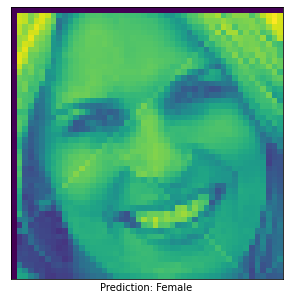

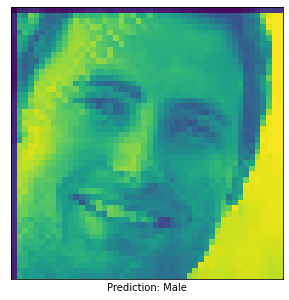

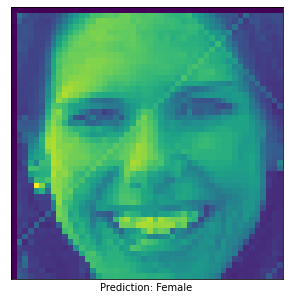

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/genderDetect/gaa_model.h5")

df=pd.read_csv("/content/drive/MyDrive/genderDetect/test_data.csv")

df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

df['pixels']=df['pixels']/255

X=np.array(df['pixels'].tolist())
X=X.reshape(X.shape[0],48,48,1)

predictions=model.predict(X)

gen={0:'Male',1:'Female'}
for i in range(X.shape[0]):
    plt.figure(figsize=(5,5))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(48,48))
    if predictions[i].round(0)==0:
        plt.xlabel("Prediction: Male")
    else:
        plt.xlabel("Prediction: Female")
plt.show()